# Import libraries

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_fscore_support
# import different algorithms  
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


# Import data

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data description


We have a data frame of 891 person on board of the Titanic; for every passenger we have the following information:  
    1) PassengerID: is the passenger number, starting from 1 to 891. no information is contained on this column, then it will be removed from the data set.  
    2) Survived: This column tell us if the passenger survived to the shipwreck or not. This will represent the Label for our supervised classification model.  
    3) Pclass: give us the socio-economic statu of the passenger. 3 different value are possibles. the 1st class is for premium tickets, the 2nd one is for medium tickets and the 3rd class is for low cost tickets.  
    4) Name: Name of the passenger. this column will not be used in our featuers construction.  
    5) Sex: Says if the passenger is male or female.  
    6) Age provid with the passenger age. we can see that 177 passenger's ages are missing.  
    7) SibSP: Is the number of sibling (brother, sister, stepbrother, stepsister) in addition to the husband or the wife.  
    8) Parch: Is the number of parents and children on board.  
    9) Ticket: Is ticket number. it will be ignored, as it doesn't give any added value.  
    10) Fare: Cost of the ticket.  
    11) Cabin: is number of the cabin. it start with a letter which define on which deck the passenger will be hosted, followed with the cabin number on this deck. only the deck letter will be used for the featuers set,and the room number will be ignored. This column has 687 missing information.  
    12) Embarked : Port of Embarkation. it can be C = Cherbourg, Q = Queenstown or S = Southampton. The embarkation port is missing for two passengers.  
    


# Data visualisation

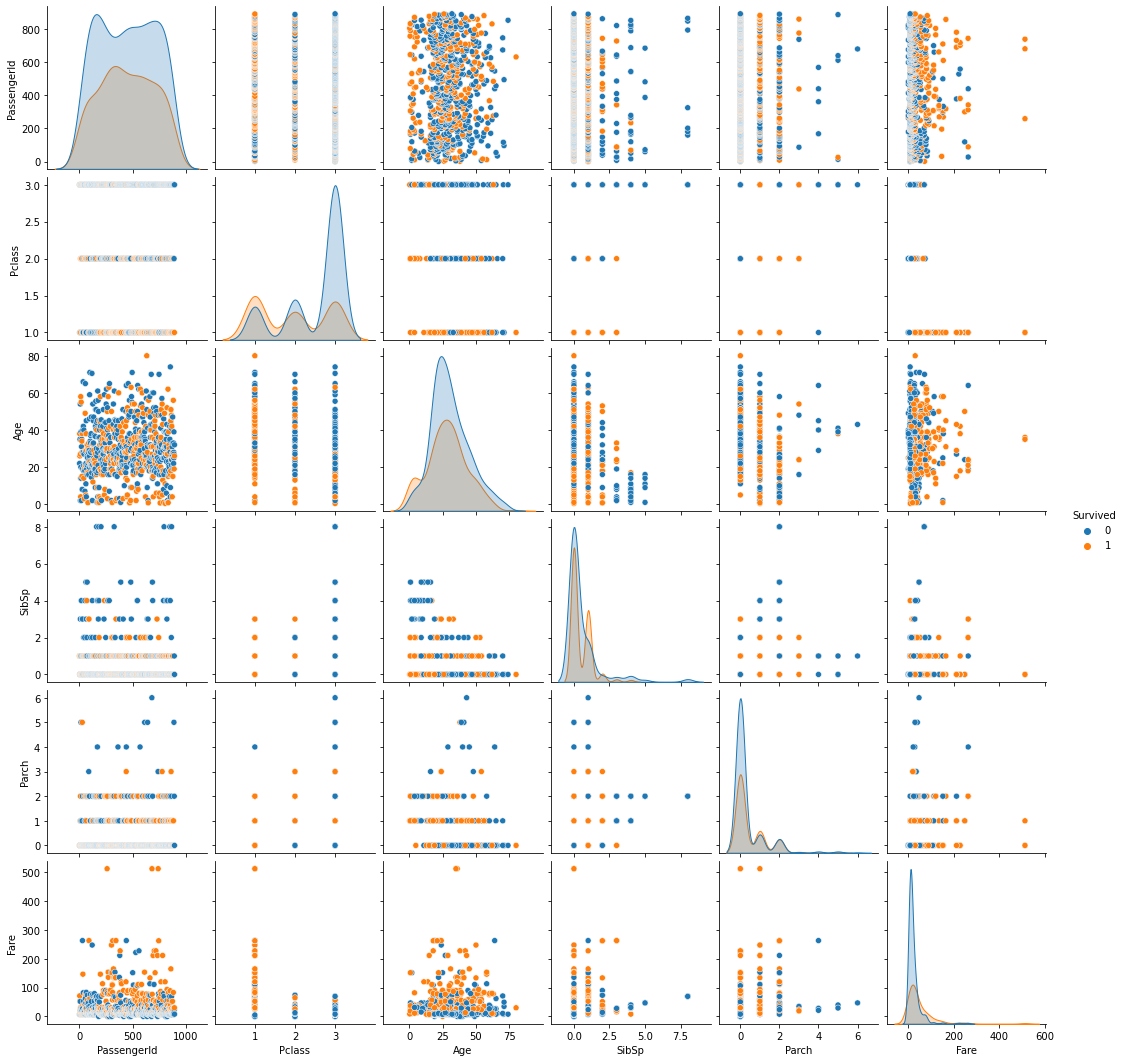

In [4]:
sns.pairplot(df, hue = "Survived")

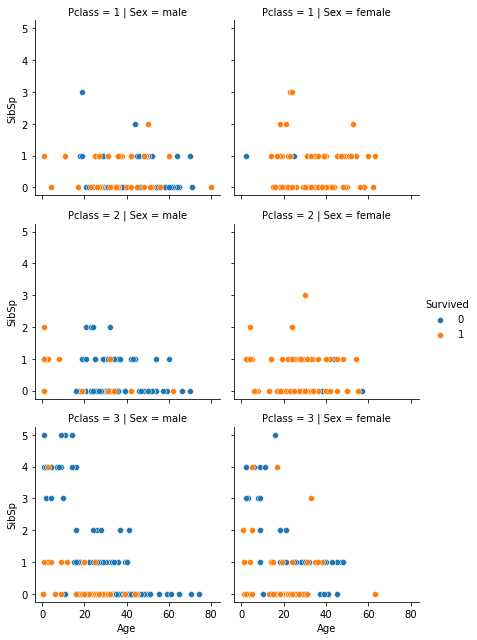

In [5]:
g = sns.FacetGrid(df, col = "Sex", row = "Pclass", hue = "Survived")
g.map(sns.scatterplot, "Age", "SibSp")
g.add_legend()

On the previous figure we have 6 graphics of sibling+wife(or husband) number, function of passenger age.  
Female population is represented on the the right and male population on the left.  
The passengers are also splited by class. From the highest class on the top of the figure, to the lowest class on the bottom.  

We can see that female population survived more frequently in the middle and high class.  
For the lower class, passengers had more chance to survive when they are young and without any wife or sibling.


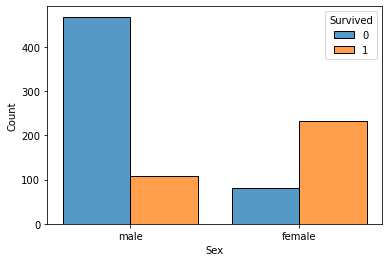

In [6]:
sns.histplot(data = df ,x = "Sex" ,hue = "Survived" ,multiple = "dodge" ,shrink = .8)

# Features and Label definition:


In [7]:
#label definition 
y = df.Survived
y.shape

(891,)

In [8]:
#Features definition
#
x = df.drop(["Survived", "PassengerId", "Ticket", "Name"], axis = 1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


# Missing data

## Fill age column

according to the previous quick insights through the data, we can see that passenger's age is an importent feature to decide if the passenger survived or not.  
As 177 data are missing on this feature, we try to fill the empty passenge's age by the mean age in his sex group and socio-economic class

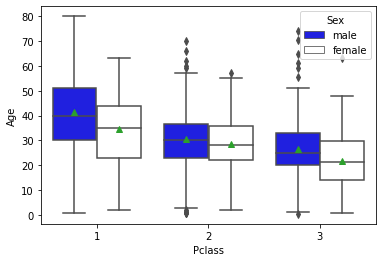

In [9]:
sns.boxplot(x = "Pclass", y = "Age",
            hue = "Sex", palette = ["b", "w"], showmeans = True,
            data = df)

We compute the average Age in every sex group and socio-economic class:

In [10]:
MeanM1 = round(x.loc[(x["Pclass"] == 1)&(x["Sex"] == "male"),["Age"]].mean()[0])
print("The mean age of class 1 men is: ", MeanM1)
MeanM2 = round(x.loc[(x["Pclass"] == 2)&(x["Sex"] == "male"),["Age"]].mean()[0])
print("The mean age of class 2 men is: ", MeanM2)
MeanM3 = round(x.loc[(x["Pclass"] == 3)&(x["Sex"] == "male"),["Age"]].mean()[0])
print("The mean age of class 3 men is: ", MeanM3)
MeanF1 = round(x.loc[(x["Pclass"] == 1)&(x["Sex"] == "female"),["Age"]].mean()[0])
print("The mean age of class 1 women is: ", MeanF1)
MeanF2 = round(x.loc[(x["Pclass"] == 2)&(x["Sex"] == "female"),["Age"]].mean()[0])
print("The mean age of class 2 women is: ", MeanF2)
MeanF3 = round(x.loc[(x["Pclass"] == 3)&(x["Sex"] == "female"),["Age"]].mean()[0])
print("The mean age of class 3 women is: ", MeanF3)

The mean age of class 1 men is:  41.0
The mean age of class 2 men is:  31.0
The mean age of class 3 men is:  27.0
The mean age of class 1 women is:  35.0
The mean age of class 2 women is:  29.0
The mean age of class 3 women is:  22.0


In [11]:
x.loc[(x["Pclass"] == 1)&(x["Sex"] == "female"),["Age"]] = x.loc[(x["Pclass"] == 1)&(x["Sex"] == "female"),["Age"]].fillna(MeanF1)
x.loc[(x["Pclass"] == 2)&(x["Sex"] == "female"),["Age"]] = x.loc[(x["Pclass"] == 2)&(x["Sex"] == "female"),["Age"]].fillna(MeanF2)
x.loc[(x["Pclass"] == 3)&(x["Sex"] == "female"),["Age"]] = x.loc[(x["Pclass"] == 3)&(x["Sex"] == "female"),["Age"]].fillna(MeanF3)
x.loc[(x["Pclass"] == 1)&(x["Sex"] == "male"),["Age"]] = x.loc[(x["Pclass"] == 1)&(x["Sex"] == "male"),["Age"]].fillna(MeanM1)
x.loc[(x["Pclass"] == 2)&(x["Sex"] == "male"),["Age"]] = x.loc[(x["Pclass"] == 2)&(x["Sex"] == "male"),["Age"]].fillna(MeanM2)
x.loc[(x["Pclass"] == 3)&(x["Sex"] == "male"),["Age"]] = x.loc[(x["Pclass"] == 3)&(x["Sex"] == "male"),["Age"]].fillna(MeanM3)


## Get deck letter from cabin number and fill missing data

We replace the cabin number by the deck letter, which is the first caracter of the cabin number:

In [12]:
x["Cabin"] = x["Cabin"].apply(lambda x: str(x)[0] if str(x) != "nan" else x)


In [13]:
x["Cabin"].describe()


count     204
unique      8
top         C
freq       59
Name: Cabin, dtype: object

In [14]:
x.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

T is a wrong value, as there is no T deck on the Titanic

<img src="deck.bmp"/>

In [15]:
x.loc[x["Cabin"] == "T",["Cabin"]] = np.nan

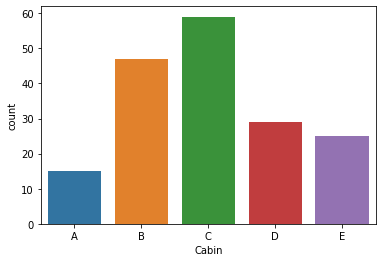

In [16]:
sns.countplot(x = "Cabin", data = x[x["Pclass"] == 1].sort_values(["Cabin"]))

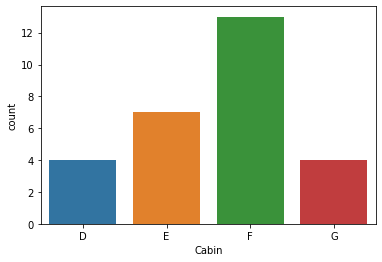

In [17]:
sns.countplot(x = "Cabin", data = x[x["Pclass"] != 1].sort_values(["Cabin"]))

Only 204 cabin numbers are available on the data.  
we fill the missing data with the most commun deck per class.  
As we dont have enough data for the middle and the lower class, we split the passengers in only two groups.  
The first group contains passengers from the first class and the second group contains passengers from both middle and lower class.

In [18]:
x.loc[x["Pclass"] == 1,["Cabin"]]=x.loc[x["Pclass"] == 1,["Cabin"]].fillna(x[x["Pclass"] == 1]["Cabin"].describe().top)
x.loc[x["Pclass"] != 1,["Cabin"]]=x.loc[x["Pclass"] != 1,["Cabin"]].fillna(x[x["Pclass"] != 1]["Cabin"].describe().top)

## fill missing Embarked data

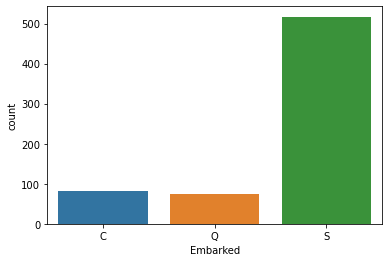

In [19]:
sns.countplot(x = "Embarked", data = x[x["Pclass"] != 1].sort_values(["Embarked"]))

most passenger embarked from Southampton port.  
As we have only two missing values, we fill them with the most freqeunt embarkation port:

In [20]:
x["Embarked"].fillna("S", inplace = True)

In [21]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Get category features from non-hierarchical data

Now we have a data set without any missing data.  
After cleaning and filling the missing data, the next step of our data analysis is to extract categorical features from the data set and get dummies from them.  
The two evident categorical features are the Sex and the Embarkation place of passengers.  
Passengers cabin could be a categorical feature too, but this feature contains an order information. Indeed, the cabin letter defin the deck position in the Titanic. the letter F is associated to the deeper deck which is the one who get flooded just after the iceberg collision, and the letter A is associated to the top deck.  
We choose will prefer a number replacement of the deck letter to dummies generation.

In [22]:
x


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,F,S
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,F,S
3,1,female,35.0,1,0,53.1000,C,S
4,3,male,35.0,0,0,8.0500,F,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,F,S
887,1,female,19.0,0,0,30.0000,B,S
888,3,female,22.0,1,2,23.4500,F,S
889,1,male,26.0,0,0,30.0000,C,C


In [23]:
x = pd.get_dummies( x, columns = ["Sex","Embarked"])
x

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,F,0,1,0,0,1
1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,26.0,0,0,7.9250,F,1,0,0,0,1
3,1,35.0,1,0,53.1000,C,1,0,0,0,1
4,3,35.0,0,0,8.0500,F,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,F,0,1,0,0,1
887,1,19.0,0,0,30.0000,B,1,0,0,0,1
888,3,22.0,1,2,23.4500,F,1,0,0,0,1
889,1,26.0,0,0,30.0000,C,0,1,1,0,0


# Translate deck letters to integers

In [24]:
mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
x = x.replace({'Cabin': mapping})

In [25]:
x

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,6,0,1,0,0,1
1,1,38.0,1,0,71.2833,3,1,0,1,0,0
2,3,26.0,0,0,7.9250,6,1,0,0,0,1
3,1,35.0,1,0,53.1000,3,1,0,0,0,1
4,3,35.0,0,0,8.0500,6,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,6,0,1,0,0,1
887,1,19.0,0,0,30.0000,2,1,0,0,0,1
888,3,22.0,1,2,23.4500,6,1,0,0,0,1
889,1,26.0,0,0,30.0000,3,0,1,1,0,0


We finished the missing data filling and we want to be sure that our features are not correlated.  
Correlated data will increase our computing time without any added value:

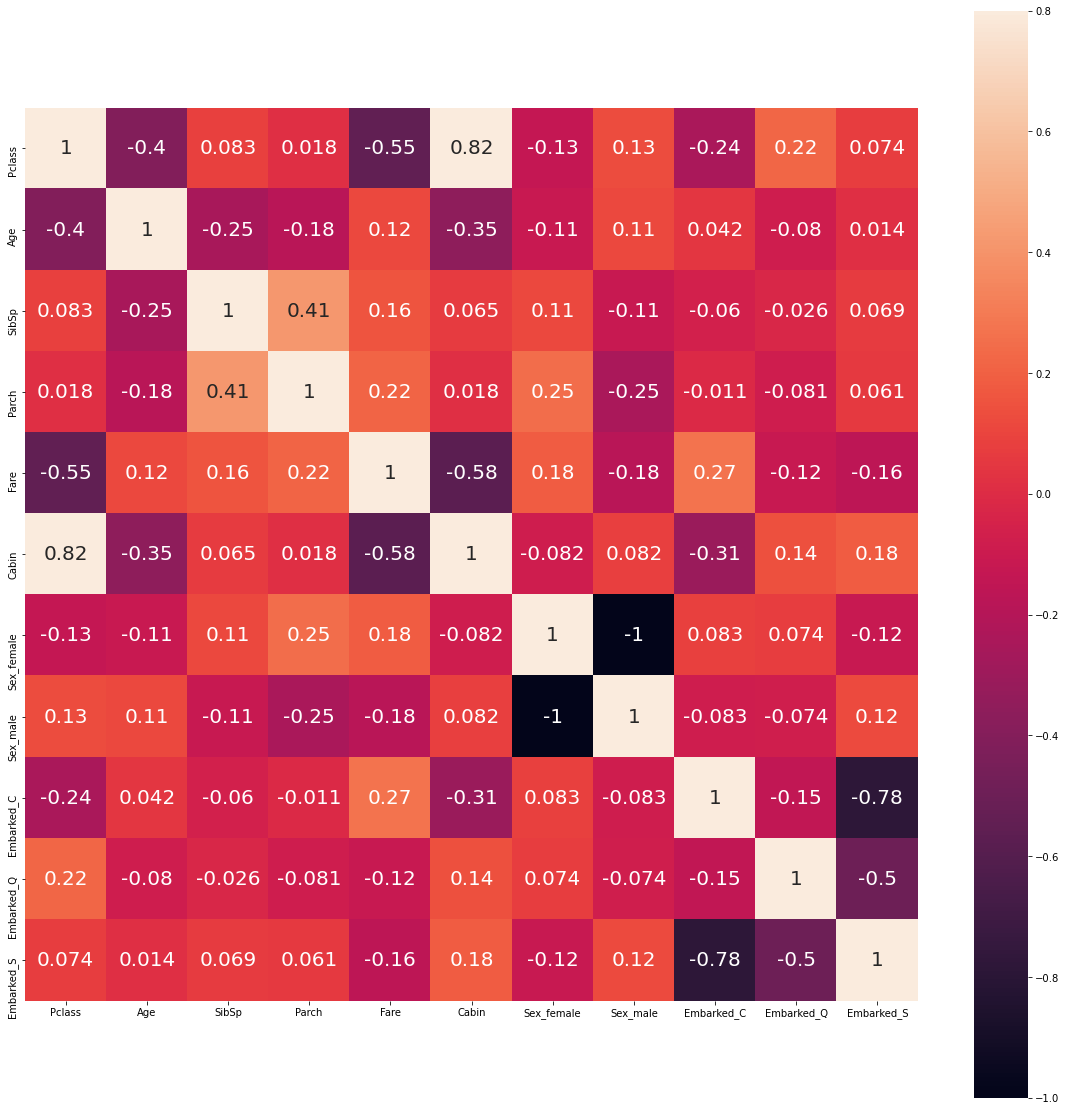

In [26]:
#correlation matrix
corrmat = x.corr()
#plot heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,annot_kws={'size': 20});

On the heatmap, every square has a correlation number. the closest to 1 it is, the more correlated are the two features on its row and column.  
Except the feature autocorrelation on the diagonal, we can see the cabin is very correlated to Pclass.  
This correlation is due to the very important number of missing data that we filled according to the Pclass. 
some other features are relatively correlated but much less than Cabin and Pclass
The Cabin feature will not be very helpful so we can remove it from our dataset

In [27]:
x.drop("Cabin", axis=1, inplace=True)

# Logistic regression model training

The data analysis is done. Our data set is ready and can be used to fit our machine learning models.  
We split the dataset into a training set and a test set.

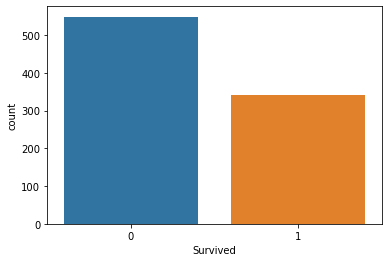

In [28]:
sns.countplot(x = "Survived", data = pd.DataFrame(y))

In [29]:
100*y.sum()/y.size

38.38383838383838

Our dataset is skewed. There is less true (y=1) than false (y=0) label values. we should use the stratify parameter in the train test split in order to keep the same true/false labels ratio in both of them:

In [30]:

x_train, x_test,y_train, y_test =train_test_split(x, y, test_size=0.2,stratify=y,random_state=42)




In [31]:
print(round(100*y_train.sum()/y_train.size, 2), '% of the train set are labeled "True"')

38.34 % of the train set are labeled "True"


In [32]:
print(round(100*y_test.sum()/y_test.size, 2), '% of the train set are labeled "False"')

38.55 % of the train set are labeled "False"


We can start with a basic logistic regression ans see how it performs on our dataset.  


In [33]:
#scaler instantiation and x_train and x_test scale and normalisation
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#Logistic regression model instentiation
Model = LogisticRegression()
#logistic regression model trained on the train data set
Model.fit(x_train,y_train)

LogisticRegression()

In [34]:

print("The logistic regression model had ",round(100*Model.score(x_train, y_train), 2),"% of accuracy on the train set")

The logistic regression model had  80.76 % of accuracy on the train set


In [35]:
print("The logistic regression model had ",round(100*Model.score(x_test, y_test), 2),"% of accuracy on the test set")

The logistic regression model had  82.12 % of accuracy on the test set


We have a very decent accuracy score of 81% on both training and testing dataset.  
The accuracu is almost the same on train and test data sets, which means that the learning has converged. We will explore this point later with the learning curves.  
As we observed earlier, our dataset is skewed. This makes the accuraccy scoring perfoming poorly to score our model. Indeed, if we consider a dataset with 80% of the exemples labeled "True" and 20% remaining are "False", a model who always predict True, will get an accuracy score of 80% while he is incapable to predict a single false labeled exemple.  
There are some more relevent scorer for our model:  
1) Precision is the ratio of correctly predicted positive observations to the total predicted positive observations(false positive and true positive). The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate.  
2) Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all positive observations in the dataset. The question recall answers is: Of all the passengers that truly survived, how many did we label?  
3) F1 Score is the weighted average of Precision and Recall.


In [36]:
precision = round(100*precision_recall_fscore_support(y_test,Model.predict(x_test), labels = [1])[0][0], 2)
recall = round(100*precision_recall_fscore_support(y_test,Model.predict(x_test), labels = [1])[1][0],2)
f1score = round(100*precision_recall_fscore_support(y_test,Model.predict(x_test), labels = [1])[2][0], 2)
print("The precision of the logistic regression model is: ", precision,"%")
print("The recall of the logistic regression model is: ", recall, "%")
print("The f1score of the logistic regression model is: ", f1score, "%")

The precision of the logistic regression model is:  81.36 %
The recall of the logistic regression model is:  69.57 %
The f1score of the logistic regression model is:  75.0 %


The precission of our model is as good as its accuracy, which means that false positive are not very frequent, we can have 80% confidence when the model predict that someone survived. However, the recall is less good than the precision. The false negative prediction still high with this model. only 68% of the survivers was labeled correctly.


# Learning curves

In [37]:
def plot_learningcurves(Model,X,y):
    
    """This function takes a model, a set of examples X and its labels y, to plot the learning
    curves.
    The learning curves ploted are the accuracy on both train and test set,
    function of the number of exemples. In the train set (The remining exemples from X are in the test set)"""
    
    # Creating CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(Model,
                                               X, y, cv = 10, scoring = 'accuracy', n_jobs = -1,
                                               # 50 different sizes of the training set
                                               train_sizes = np.linspace(0.01, 1.0, 50))

    # Creating means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Creating means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Drawing lines
    plt.subplots(1, figsize = (10, 10))
    plt.plot(train_sizes, train_mean, '--', color = "blue",  label = "Training score")
    plt.plot(train_sizes, test_mean, color = "red", label = "Cross-validation score")

    # Drawing bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     color = 'blue', alpha = 0.2, label = "Training score variance")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = 'red',
                     alpha = 0.2, label = "Cross-validation score variance")

    # Creating plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc = "best")
    plt.tight_layout(); plt.show()

    



Plot the learning curves for LogisticRegression 

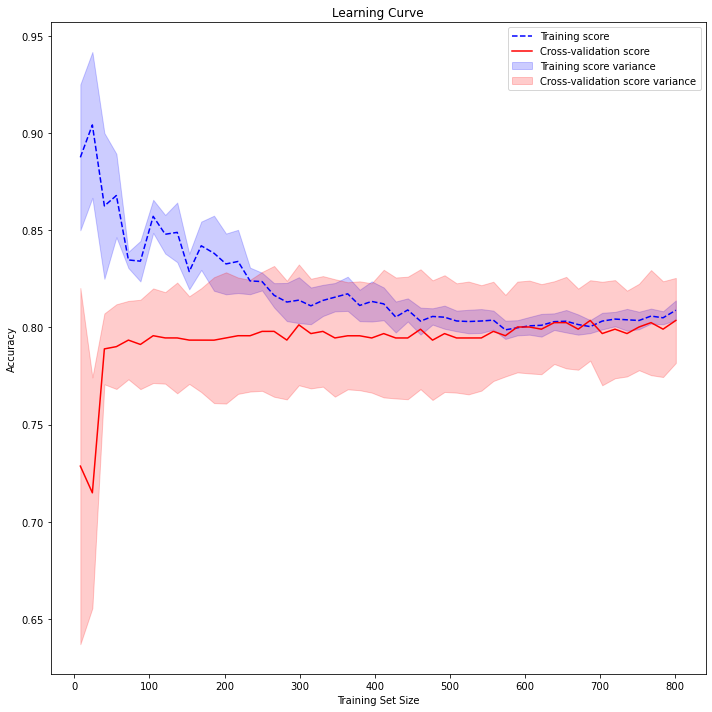

In [38]:
plot_learningcurves(LogisticRegression(),x,y)

The learning curves shows fast converge of the model but we have a large variance of the final accuracy score represented by the light blue and red bands on the plots.
The final f1 score depends on the training set selected before the learning. 

# Classifier comparaison:

In this section, we will compare the performances of ten different classifiers:  
    &emsp;1) Logistic Regression()  
    &emsp;2) KNeighborsClassifier(3)  
    &emsp;3) SVC(kernel="linear", C=0.025)  
    &emsp;4) GaussianProcessClassifier(1.0 * RBF(1.0))  
    &emsp;5) DecisionTreeClassifier(max_depth=5)  
    &emsp;6) RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)  
    &emsp;7) MLPClassifier(alpha=1, max_iter=1000)  
    &emsp;8) AdaBoostClassifier()  
    &emsp;9) GaussianNB()  
    &emsp;10) QuadraticDiscriminantAnalysis()  

Before to start working on our classifiers, we need a function to score our models:

In [39]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
    
    """The function takes a model, a training set(x_train) 
    and a test set (x_test) with there labels (y_train, y_test) 
    to returns a dataframe with,the model's name, it's Accuracy on both training set and test set 
    and precision, recall and f1 score of this model on the test set """
    
    # Model instentiation and fit to the training data
    clf = model
    clf.fit(x_train,y_train)
    # Accuracy score on the training and test set
    train_accuracy = round(100*clf.score(x_train,y_train),2)
    test_accuracy = round(100*clf.score(x_test,y_test),2)
    # Get precision, recall and f1score on the test set
    precision, recall,fscore,support = precision_recall_fscore_support(y_test,clf.predict(x_test),labels = [1])
    df = pd.DataFrame({"Name":[str(model).split("(")[0]]})
    df['Train_Accuracy (%)'] = train_accuracy
    df['Test_Accuracy (%)'] = test_accuracy
    df['Precision (%)']= round(100*precision[0],2)
    df['Recall (%)'] = round(100*recall[0],2)
    df['Fscore (%)'] = round(100*fscore[0],2)
    return df

We use the evalute_model function to compare performances of the selected classifiers:
    

In [40]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5,),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [41]:
Evaluation=evaluate_model(LogisticRegression(),x_train,y_train,x_test,y_test)
for i in classifiers:
    Evaluation=Evaluation.append(evaluate_model(i,x_train,y_train,x_test,y_test),ignore_index=True)

#The dataframe is sorted by accuracy on the test set
Evaluation.sort_values(by="Test_Accuracy (%)",ascending=False)
    

C:\Users\greew\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Name,Train_Accuracy (%),Test_Accuracy (%),Precision (%),Recall (%),Fscore (%)
0,LogisticRegression,80.76,82.12,81.36,69.57,75.00
3,GaussianProcessClassifier,84.13,81.01,84.31,62.32,71.67
5,RandomForestClassifier,85.39,81.01,85.71,60.87,71.19
6,MLPClassifier,84.55,81.01,84.31,62.32,71.67
9,QuadraticDiscriminantAnalysis,80.06,81.01,79.66,68.12,73.44
1,KNeighborsClassifier,87.92,79.33,75.00,69.57,72.18
8,GaussianNB,79.07,78.77,73.85,69.57,71.64
2,SVC,78.93,77.65,73.77,65.22,69.23
7,AdaBoostClassifier,84.83,77.09,70.59,69.57,70.07
4,DecisionTreeClassifier,86.52,76.54,75.47,57.97,65.57


### Result interpretation

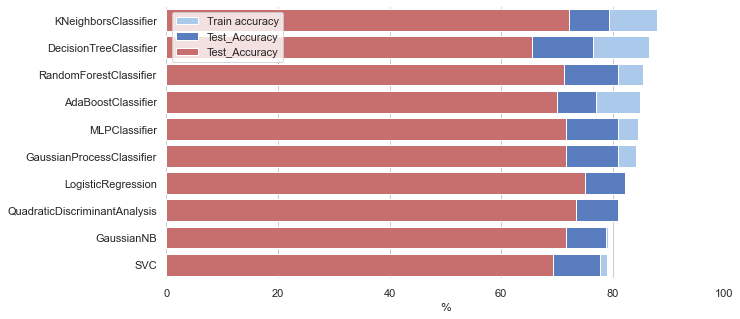

In [42]:


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes("pastel")

# Plot the train accuracy
sns.set_color_codes("pastel")
sns.barplot(x="Train_Accuracy (%)", y="Name", data=Evaluation.sort_values(by="Train_Accuracy (%)",ascending=False),
            label="Train accuracy", color="b")

# Plot the test accuracy
sns.set_color_codes("muted")
sns.barplot(x="Test_Accuracy (%)", y="Name", data=Evaluation.sort_values(by="Train_Accuracy (%)",ascending=False),
            label="Test_Accuracy", color="b")

# Plot the f1 score
sns.set_color_codes("muted")
sns.barplot(x="Fscore (%)", y="Name", data=Evaluation.sort_values(by="Train_Accuracy (%)",ascending=False),
            label="Test_Accuracy", color="r")

ax.set(xlim=(0, 100), ylabel="",
       xlabel="%")
sns.despine(left=True, bottom=True)
ax.legend(loc=2)

Logistic regression shows the best accuracy on the test set. the model has almost the same accuracy on the train set. the test accuracy is a little bit higher than train accuracy due to the variance of the score as showed on the learning curves.  
KNeighborsClassifier has better accuracy on the train set but on the test set, we have a significant drop of accuracy.  
  
As our set has less than 40% of positive labels, it's important to consider the precission and recall of the models before to choose the best one for our purpose.  
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.  
  
It's the MLPClassifier and gaussianprocess who give the best performance opn the Precision. But it's less performent on the recall. and Logistic regression's precission is not very far from them with significant improvement on the recall.

The Fscore is the harminic mean of precision and recall, so we can select a balanced classifier using this score.  
The best recall is performed by many clasifiers but only Logistic regression have this score besids a very decent precision. which means that this last model is the best performing on the F1 score

Logistic regression seems very adapted to our machinelearning problem, but we should not forget that this model is very simple and we may be able to perfom better with a different model if we tune it and use it with its best adapted hyperparameters.


# Hyperparameters tune

In this section, we will work on the hyperparameters of our models to enhance thier performence.  
For every model, we have to define a dictionary with the hyperparameters to tune and a list of values to try.  
We do a gridsearch with the model and this dictionnary in order to select the best performing hyperparameters according to the scorer that we choose.  
The scorer that we will use if the f1 score.

### Kneighbors Classifier

In [43]:

#KNeighborsClassifier Tuning
parameters = [{
    "weights": ['uniform', 'distance'],
    "n_neighbors":  [x for x in range(1,9)],
    "leaf_size": [x for x in range(10,20)],
    "p": [x for x in range(1,5)]
    }]

In [44]:
clf1 = GridSearchCV(KNeighborsClassifier(n_jobs=-1),
                    parameters,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)
clf1.fit(x_train, y_train)
clf1.best_params_

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    7.6s finished


{'leaf_size': 18, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

The Best hyperparameters found for KneighborsClassifier are:  
&emsp;- Algoritm: auto  
&emsp;- leaf_size: 18  
&emsp;- n_neighbors: 3  
&emsp;- p: 1  
&emsp;- weights: uniform  

### Decision Tree Classifier

In [45]:
#Decision tree Tuning
parameters = [{
    "criterion": ['gini', 'entropy'],
    "min_samples_split":  [2,3,4],
    "min_samples_leaf":  [1,2,3],
    "max_features": ['auto',"sqrt","log2"]
    }]

In [46]:
clf2 = GridSearchCV(DecisionTreeClassifier(random_state= 42),
                    parameters, scoring='f1',
                    verbose=1,
                    n_jobs=-1)
clf2.fit(x_train, y_train)
clf2.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished


{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2}

The Best hyperparameters found for DecisionTreeClassifier are:  
&emsp;- criterion: entropy  
&emsp;- max_features: auto  
&emsp;- min_sample_leaf: 3  
&emsp;- min_sample_split: 2  


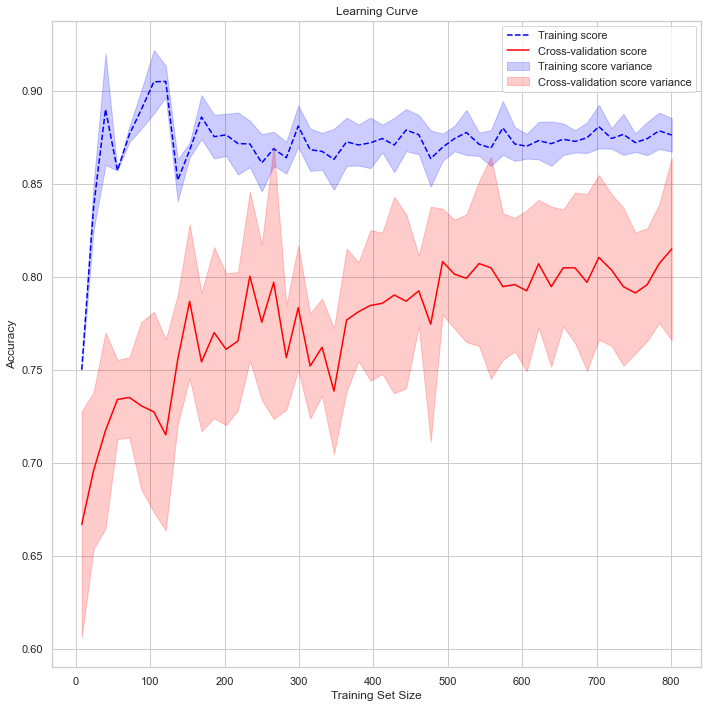

In [47]:
plot_learningcurves(clf2.best_estimator_,x,y)

### Rondom Forest Classifier

In [48]:
#Rondom Forest Classifier Tuning
parameters = [{
    "criterion": ['gini', 'entropy'],
    "n_estimators":  [x for x in range(100,800,70)],
    "min_samples_leaf":  [1,2,3],
    "min_samples_split": [2,3,4]
    }]

In [49]:
clf3 = GridSearchCV(RandomForestClassifier(random_state= 42),
                    parameters, scoring='f1',
                    verbose=1,
                    n_jobs=-1)
clf3.fit(x_train, y_train)
clf3.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.3min finished


{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 520}

The Best hyperparameters found for RondomForestClasifier are:  
&emsp;- criterion: gini  
&emsp;- n_estimators: 520  
&emsp;- min_sample_leaf: 3  
&emsp;- min_sample_split: 2  

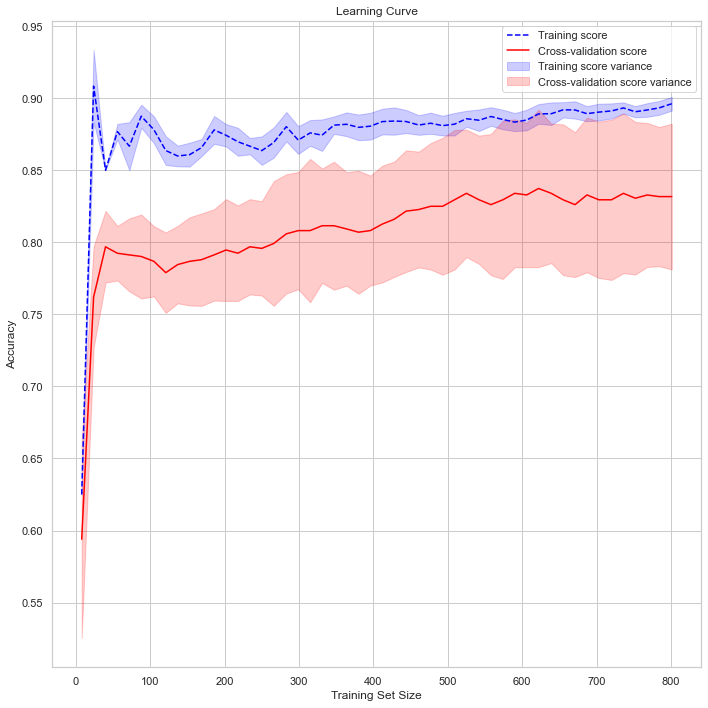

In [51]:
plot_learningcurves(clf3.best_estimator_,x,y)

### Multilayer Perceptron Classifier

In [52]:
#MLPClassifier Tuning
parameters = [{
    "activation": ['identity', 'logistic', 'relu'],
    "solver":  ["adam", "lbfgs", "sgd"],
    "alpha":  [0.001, 0.01, 0.1, 1, 10, 100],
    "hidden_layer_sizes": [(x,) for x in range(100,500,50)],
    "learning_rate_init": [0.001, 0.01, 0.1, 1]
    }]

In [53]:
clf4 = GridSearchCV(MLPClassifier(random_state= 42),
                    parameters, scoring='f1',
                    verbose=1,
                    n_jobs=-1)
clf4.fit(x_train, y_train)
clf4.best_params_

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3074 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4674 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 5624 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 6674 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 7824 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 21.4min finished


{'activation': 'relu',
 'alpha': 1,
 'hidden_layer_sizes': (400,),
 'learning_rate_init': 0.1,
 'solver': 'adam'}

The Best hyperparameters found for RondomForestClasifier are:  
&emsp;- activation: relu  
&emsp;- hidden_layer_sizes: 400  
&emsp;- learning rate: 0.1   
&emsp;- solver: adam

### Logistic Regression 

In [54]:
# Tuning
parameters = [{
    "penalty": [ 'l1', "l2", "elasticnet"],
    "C":  [0.001, 0.01, 0.1, 1,5,10],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    }]

In [55]:
clf5 = GridSearchCV(LogisticRegression(random_state= 42),
                     parameters,
                     scoring='f1',
                     verbose=1,
                     n_jobs=-1)
clf5.fit(x_train, y_train)
clf5.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    0.5s finished


{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

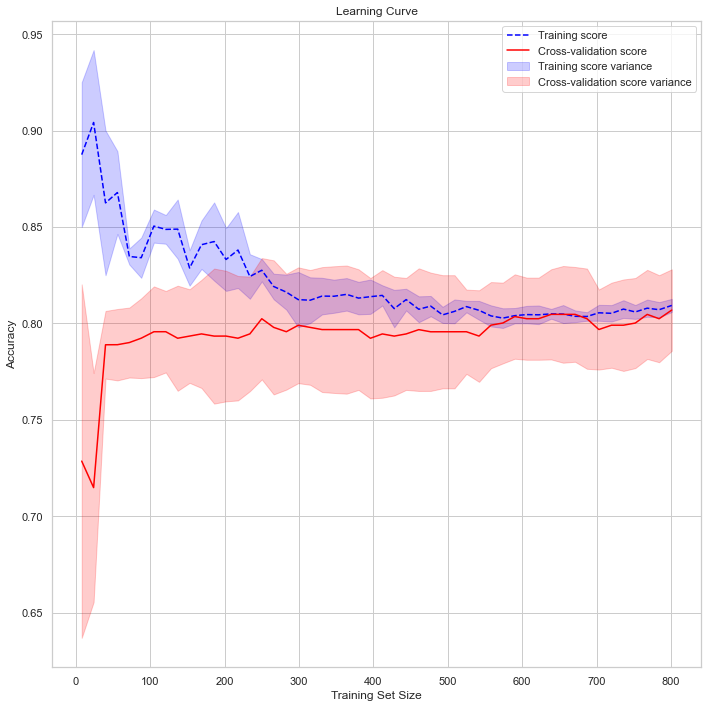

In [56]:
plot_learningcurves(clf5.best_estimator_,x,y)

In [57]:
tuned_classifiers = [clf1.best_estimator_,
                     clf2.best_estimator_,
                     clf3.best_estimator_,
                     clf4.best_estimator_,
                     clf5.best_estimator_
                    ]

In [58]:
Evaluation_tuned = pd.DataFrame()
for i in tuned_classifiers:
    Evaluation_tuned = Evaluation_tuned.append(evaluate_model(i,x_train,y_train,x_test,y_test),ignore_index=True)

#The dataframe is sorted by accuracy on the test set
Evaluation_tuned.sort_values(by="Test_Accuracy (%)",ascending=False)

,Name,Train_Accuracy (%),Test_Accuracy (%),Precision (%),Recall (%),Fscore (%)
4,LogisticRegression,80.76,82.12,81.36,69.57,75.00
2,RandomForestClassifier,89.75,81.01,83.02,63.77,72.13
3,MLPClassifier,83.99,79.33,82.00,59.42,68.91
0,KNeighborsClassifier,87.22,78.21,72.73,69.57,71.11
1,DecisionTreeClassifier,88.62,75.98,73.21,59.42,65.60


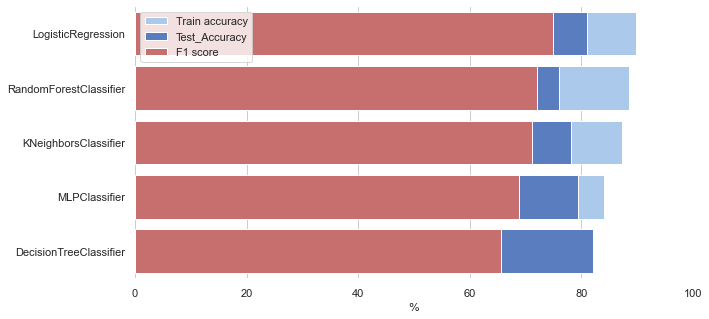

In [59]:


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes("pastel")

# Plot the train accuracy
sns.set_color_codes("pastel")
sns.barplot(x="Train_Accuracy (%)", y="Name", data=Evaluation_tuned.sort_values(by="Train_Accuracy (%)",ascending=False),
            label="Train accuracy", color="b")

# Plot the test accuracy
sns.set_color_codes("muted")
sns.barplot(x="Test_Accuracy (%)", y="Name", data=Evaluation_tuned.sort_values(by="Train_Accuracy (%)",ascending=False),
            label="Test_Accuracy", color="b")

# Plot the f1 score
sns.set_color_codes("muted")
sns.barplot(x="Fscore (%)", y="Name", data=Evaluation_tuned.sort_values(by="Fscore (%)",ascending=False),
            label="F1 score", color="r")

ax.set(xlim=(0, 100), ylabel="",
       xlabel="%")
sns.despine(left=True, bottom=True)
ax.legend(loc=2)

Even with hyperparameters optimization, logistic regression still performing the best on this problem. But, we can see on random forest and decision tree learning curves, that the models didn't converge. indeed, we still have a slite difference between the accuracy on the training and the testing sets. Hence, a work on the features engineering side can emprove those models.  
an exemple of feature desine is to create importance class for passenger according to there distinctions 



# Generate the CSV file for kaggle submition

Definition of a function which use a trained classifier and row dataframe to clean and tranform the data, and fill the missing inromation before to make predection on it and save the result in the appropriate form for kaggle submition.

In [70]:
def Prediction_csv(model,csv):
    #exctractPassengerId as we need it to make the final csv
    PassengerId=csv.PassengerId
    #drop usless data for the predection
    x=csv.drop(["PassengerId","Ticket","Name"],axis=1)
    #compute all the age means function of class and sex
    MeanM1=round(x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]].mean()[0])
    MeanM2=round(x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]].mean()[0])
    MeanM3=round(x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]].mean()[0])
    MeanF1=round(x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]].mean()[0])
    MeanF2=round(x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]].mean()[0])
    MeanF3=round(x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]].mean()[0])
    
    #fill the missing ages by the appropriate means
    x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]].fillna(MeanF1)
    x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]].fillna(MeanF2)
    x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]].fillna(MeanF3)
    x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]].fillna(MeanM1)
    x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]].fillna(MeanM2)
    x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]].fillna(MeanM3)
    #keep only the first letter for cabin number
    x["Cabin"]=x["Cabin"].apply(lambda x: str(x)[0] if str(x)!="nan" else x)
    #fill the missing cabin data by the most commun cabin in first class and in middle+lower class
    x.loc[x["Pclass"]==1,["Cabin"]]=x.loc[x["Pclass"]==1,["Cabin"]].fillna(x[x["Pclass"]==1]["Cabin"].describe().top)
    x.loc[x["Pclass"]!=1,["Cabin"]]=x.loc[x["Pclass"]!=1,["Cabin"]].fillna(x[x["Pclass"]!=1]["Cabin"].describe().top)
    #fill the missing embarkation data by the most commun one(S)
    x["Embarked"].fillna("S",inplace=True)
    #generate categorical features from sex and embarked data
    x=pd.get_dummies(x,columns=["Sex","Embarked"])
    #transform the deck corresponding letter to numbers
    mapping={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
    x.drop("Cabin", axis=1, inplace=True)
    #fill the missing data if there is, by 0
    x=x.fillna(0)
    #scale x
    x= scaler.fit_transform(x)
    #predict y from x
    Prediction=model.predict(x)
    #create a dataframe with the appropriate kaggle submition format using prediction and PassengerId
    df=pd.DataFrame({"PassengerId":PassengerId,"Survived":Prediction})
    #save the dataframe into a csv file
    df.to_csv(r'C:\Users\greew\Documents\Kaggle\Titanic\Prediction.csv',index=False)

Before to use the previous function for a csv submition file, we import the test data from a csv and we train the submition classifier on our training data

In [71]:
csv=pd.read_csv("test.csv")
submition_model=clf5.best_estimator_
submition_model.fit(x_train,y_train)
submition_model.score(x_test,y_test)

0.8212290502793296

In [72]:
submition_model.score(x_train,y_train)

0.8075842696629213

In [73]:
Prediction_csv(submition_model,csv)

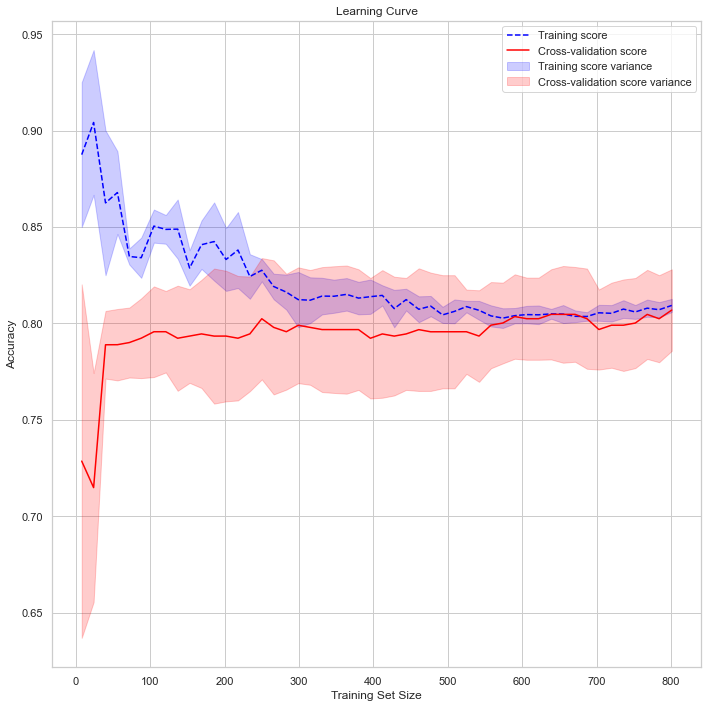

In [69]:
plot_learningcurves(submition_model,x,y)

### Conclusion

The model scores around 80%. We get a score of 76% on Kaggle:

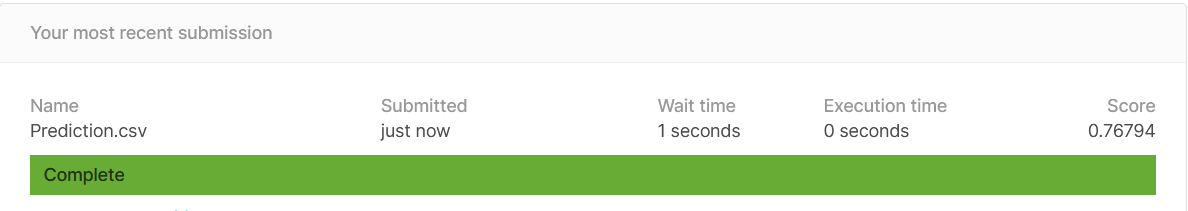


For further more improvement on our model, we can have a look at the feature importance in order to identify the most significant features on the final decision of the model.
We can also do some feature engineering and extract more features from our data set.
An interesting feature that we can extract from the "Name" column, is the honorific title (Mr, Mrs, Miss, Lord, Rev...)